In [1]:
import os
import numpy as np
import pandas as pd
import importlib
from psifr import fr
from cfr import framework

model_dir = '/Users/morton/Dropbox/work/cmr_cfr/cfr'
data_file = os.path.join(model_dir, 'cfr_mixed_eeg.csv')
patterns_file = os.path.join(model_dir, 'cfr_patterns.hdf5')
fit_dir = os.path.join(model_dir, 'fits', 'v4')
fig_dir = '/Users/morton/manuscripts/cfr/figs/cfr'
if not os.path.exists(fig_dir):
    os.makedirs(fig_dir)

## Load model fits

In [2]:
gold = ['cmr_fcf-loc_ff-cat-use']
new = [f'cmrs_fcf-{comp}_sl-B_enc-B_rec' 
       for comp in ['loc-cat', 'loc-use']]
new_names = ['IC', 'IS']
components = ['B_enc', 'B_rec', 'Lfc', 'Lcf', 'B_enc-B_rec', 'Lfc-Lcf']
base = ['cmrs_fcf-loc-cat-use']
models = base + [f'cmrs_fcf-loc-cat-use_sl-{comp}' for comp in components] + gold + new
model_names = ['ICS'] + components + ['I-CS'] + new_names
res = framework.read_model_fits(fit_dir, models, model_names)
specs = framework.read_model_specs(fit_dir, models, model_names)
res[['logl', 'k']]

logl     k
model subject                   
ICS   1        -850.570323  11.0
      2        -995.617001  11.0
      3        -894.017171  11.0
      5       -1049.036800  11.0
      8        -745.944408  11.0
...                    ...   ...
IS    42       -731.187696  12.0
      43      -1034.139108  12.0
      44       -864.189329  12.0
      45       -919.244484  12.0
      46      -1000.071150  12.0

[290 rows x 2 columns]

In [3]:
sl_param = ['B_enc_loc', 'B_enc_cat', 'B_enc_use', 'B_rec_loc', 'B_rec_cat', 'B_rec_use']
res.loc['B_enc-B_rec', sl_param]

,B_enc_loc,B_enc_cat,B_enc_use,B_rec_loc,B_rec_cat,B_rec_use
subject,,,,,,
1,0.739697,0.937652,0.206570,0.763237,0.999999,0.999943
2,0.708889,0.683347,0.682284,0.799274,0.000129,0.999883
3,0.654258,0.037699,0.014270,0.745811,1.000000,1.000000
5,0.504383,0.000070,0.214384,0.665585,0.999997,0.999935
8,0.671330,0.597041,0.631072,0.699994,0.996952,0.998803
11,0.198551,0.000000,0.765920,0.196862,1.000000,1.000000
16,0.688493,0.133869,0.495527,0.679670,1.000000,1.000000
18,0.452302,0.000000,0.261234,0.657288,1.000000,1.000000
22,0.660416,0.212486,0.136829,0.713835,1.000000,1.000000


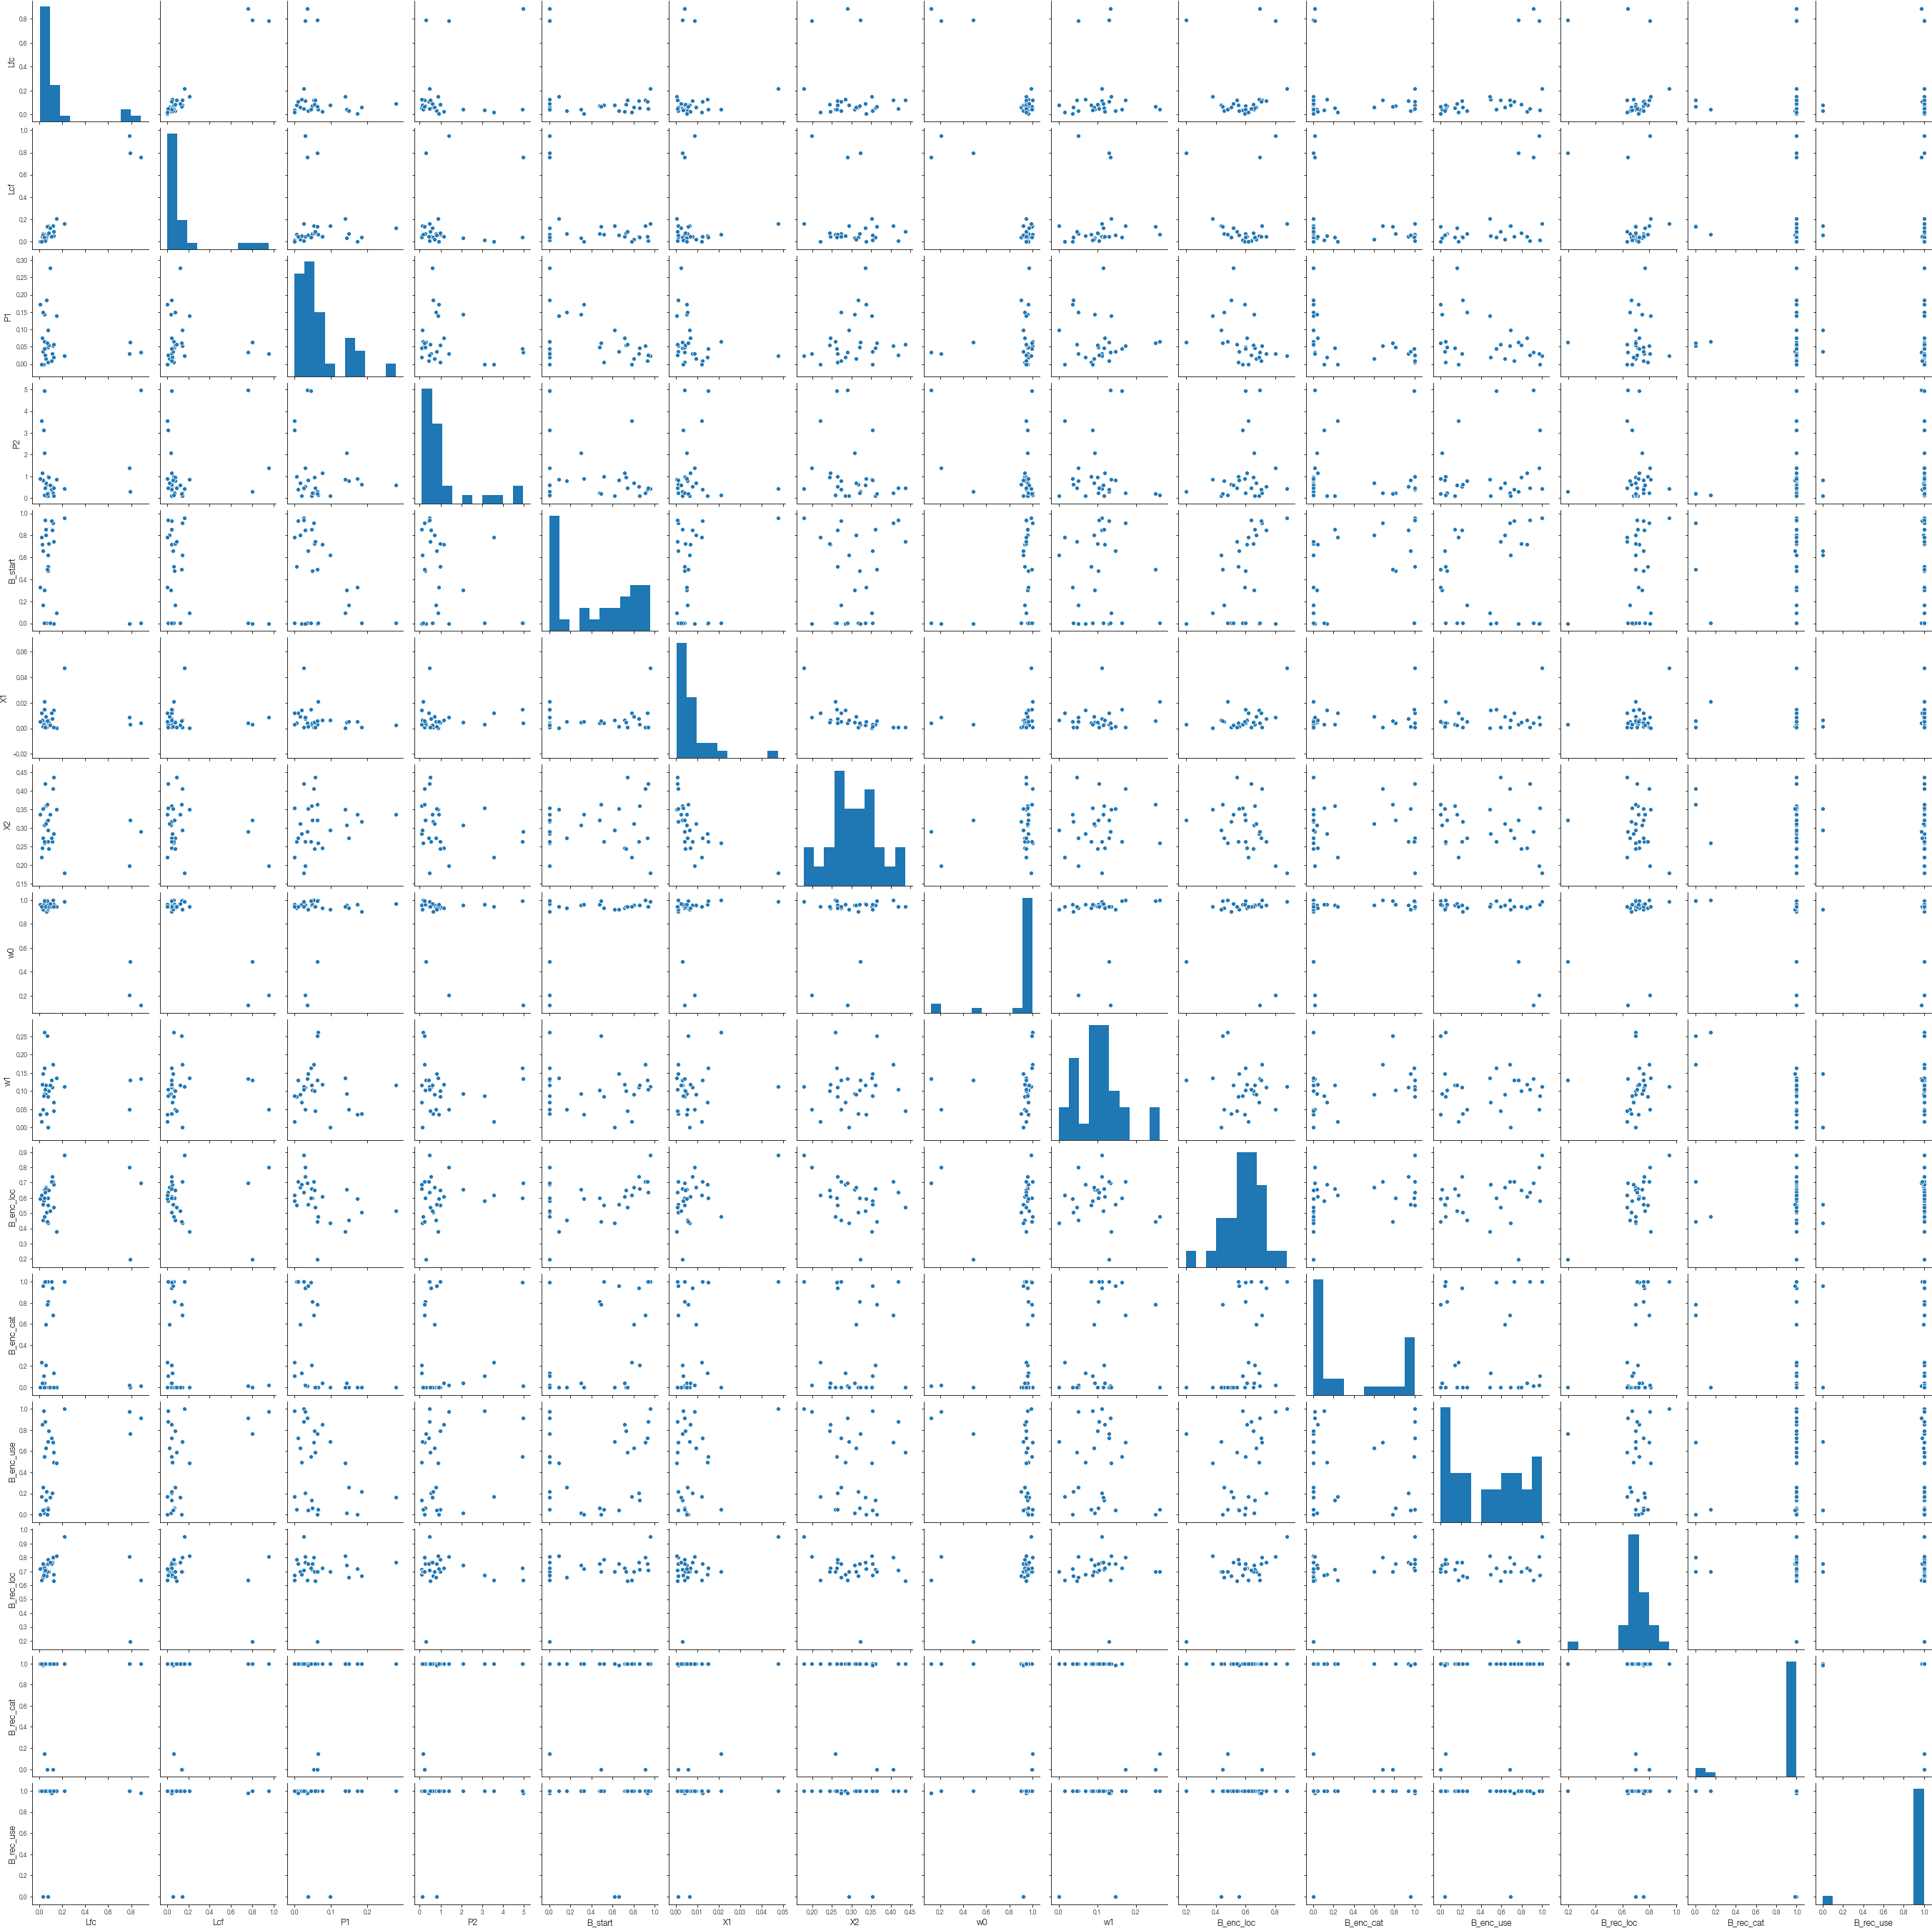

In [63]:
free = specs.loc['B_enc-B_rec'].query('kind == "free"').index.to_list()
sns.pairplot(res.loc['B_enc-B_rec'], vars=free);

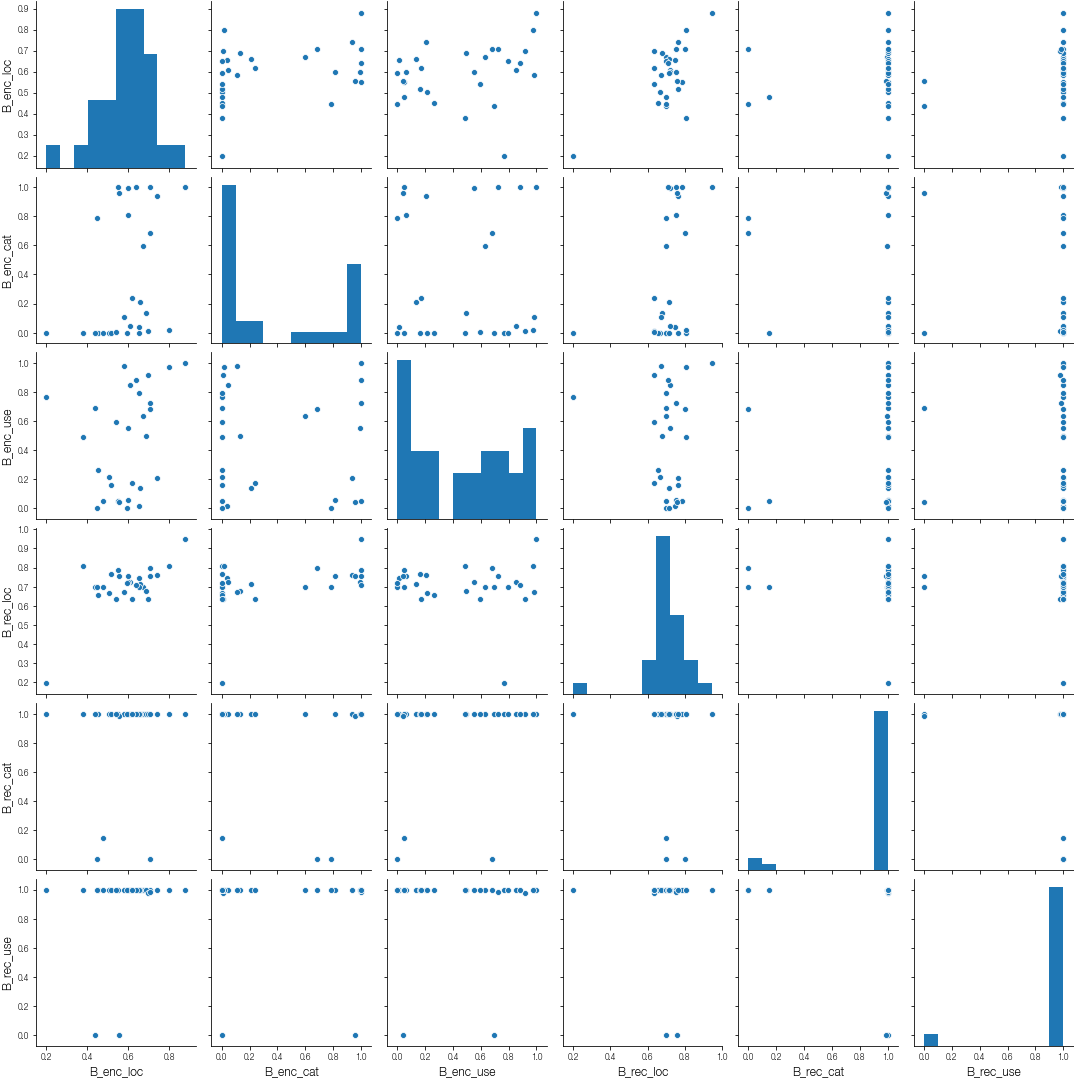

In [47]:
sns.pairplot(res.loc['B_enc-B_rec'], vars=sl_param)

In [45]:
res.loc['B_enc-B_rec'].T

subject,1,2,3,5,8,11,16,18,22,23,...,35,37,38,40,41,42,43,44,45,46
rep,3.000000,4.000000,0.000000,2.000000,1.000000,0.000000,2.000000,0.000000,2.000000,3.000000,...,3.000000,2.000000,3.000000,4.000000,1.000000,4.000000,4.000000,1.000000,0.000000,1.000000
T,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,...,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000
Lfc,0.114827,0.119528,0.041926,0.061770,0.058533,0.792599,0.123964,0.033122,0.053523,0.073671,...,0.031146,0.218606,0.781549,0.106690,0.091331,0.043127,0.049964,0.004410,0.018033,0.122947
Lcf,0.042814,0.143423,0.033102,0.038721,0.018881,0.799315,0.050598,0.071393,0.039588,0.070384,...,0.055475,0.161441,0.951507,0.041922,0.119205,0.040151,0.004013,0.000319,0.000000,0.090720
P1,0.029596,0.052758,0.143525,0.184153,0.016089,0.063470,0.019214,0.149640,0.046070,0.047958,...,0.037154,0.024846,0.029515,0.009927,0.278241,0.044789,0.025431,0.172828,0.000000,0.057404
P2,0.534473,0.229666,2.086917,0.650516,0.709891,0.309092,0.100000,0.785207,0.100000,0.255997,...,0.817884,0.451351,1.403734,0.418291,0.615275,4.934884,0.472962,0.893049,3.562058,0.483780
B_enc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
B_start,0.847142,0.910729,0.302955,0.005786,0.805102,0.000000,0.000000,0.165257,0.857322,0.475739,...,0.656665,0.960126,0.000064,0.931531,0.000213,0.005605,0.939085,0.327708,0.785075,0.742292
B_rec,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
X1,0.007746,0.001013,0.004928,0.001058,0.009273,0.003031,0.014577,0.005468,0.002998,0.004148,...,0.001190,0.047540,0.008761,0.012332,0.002364,0.015104,0.000871,0.005190,0.012143,0.000692


## Calculate AIC weights

In [4]:
res['aic'] = framework.aic(res['logl'], res['n'], res['k'])
aic = res.reset_index().pivot(index='subject', columns='model', values='aic')
aic = aic.reindex(columns=model_names)
waic = aic.copy()
waic.iloc[:, :] = framework.waic(aic.to_numpy())

In [5]:
logl = res.reset_index().pivot(index='subject', columns='model', values='logl')
logl = logl.reindex(columns=model_names)

In [6]:
k = res['k'].groupby('model').sum()
logl_tot = logl.sum()
summary = pd.concat((logl_tot, k), axis=1, keys=['logl', 'k'])
summary.sort_values(['logl', 'k'])

,logl,k
IS,-26225.895075,348.0
ICS,-25946.475259,319.0
Lcf,-25928.578890,377.0
B_enc,-25902.215162,377.0
Lfc,-25894.540128,377.0
Lfc-Lcf,-25873.214076,435.0
IC,-25744.926457,348.0
B_rec,-25638.521057,377.0
I-CS,-25626.918315,319.0
B_enc-B_rec,-25584.907498,435.0


In [30]:
logl.sum().sort_values()

model
ICS           -25946.475259
Lcf           -25928.578890
B_enc         -25902.215162
Lfc           -25894.540128
Lfc-Lcf       -25873.214076
B_rec         -25638.521057
I-CS          -25626.918315
B_enc-B_rec   -25584.907498
dtype: float64

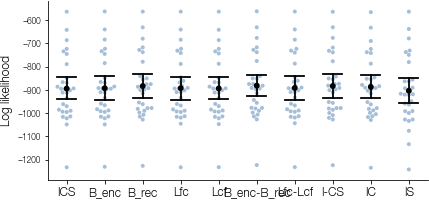

In [7]:
c = [.65, .75, .85]
df = logl.reset_index().melt(id_vars='subject', value_name='logl')
g = fr.plot_swarm_error(df, x='model', y='logl', height=3, aspect=2,
                        swarm_color=c, swarm_size=4)
g.set(ylabel='Log likelihood');
g.axes[0, 0].tick_params(axis='x', labelsize='large')

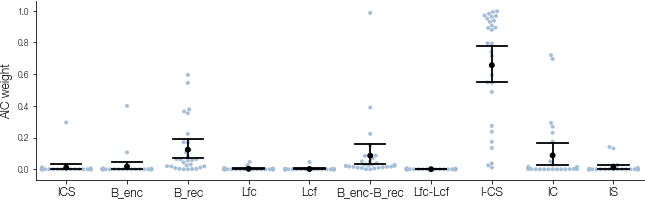

In [9]:
import importlib
import seaborn as sns
importlib.reload(sns)
importlib.reload(fr)
c = [.65, .75, .85]
df = waic.reset_index().melt(id_vars='subject', value_name='waic')
g = fr.plot_swarm_error(df, x='model', y='waic', height=3, aspect=3,
                        swarm_color=c, swarm_size=4)
g.set(ylabel='AIC weight');
g.axes[0, 0].tick_params(axis='x', labelsize='large')
#g.savefig(os.path.join(fig_dir, 'waic2.pdf'))

## Create a parameter table

In [5]:
df = framework.read_model_specs(fit_dir, models, model_names)
free_param = df.reset_index().query("kind == 'free'")['param'].unique()

In [6]:
table = pd.DataFrame(index=free_param, columns=model_names)
model_stats = res.groupby('model').agg(['mean', 'sem'])
stop = ['rep', 'n', 'k', 'w0', 'w1', 'logl', 'aic']
fields = [col for col in res.columns if col not in stop]
for model in model_names:
    m = model_stats.loc[model]
    for field in free_param:
        f = m[field]
        if np.isnan(f['mean']):
            table.loc[field, model] = (f"---")
        else:
            table.loc[field, model] = f"{f['mean']:.2f} ({f['sem']:.2f})"
table

,I,C,S,IC,IS,CS,ICS
Lfc,0.13 (0.01),0.75 (0.01),0.60 (0.04),0.12 (0.01),0.15 (0.01),0.67 (0.02),0.13 (0.01)
Lcf,0.11 (0.01),0.80 (0.01),0.68 (0.02),0.11 (0.01),0.13 (0.01),0.70 (0.01),0.11 (0.01)
P1,0.27 (0.07),0.08 (0.01),0.28 (0.05),0.22 (0.05),0.21 (0.05),0.14 (0.03),0.23 (0.05)
P2,0.95 (0.15),0.41 (0.03),0.51 (0.08),1.73 (0.24),1.57 (0.25),0.38 (0.04),1.84 (0.27)
B_enc,0.72 (0.02),0.04 (0.00),0.14 (0.03),0.64 (0.02),0.67 (0.02),0.07 (0.02),0.60 (0.02)
B_start,0.67 (0.07),0.00 (0.00),0.06 (0.02),0.54 (0.08),0.63 (0.07),0.02 (0.01),0.48 (0.08)
B_rec,0.79 (0.02),0.96 (0.01),0.81 (0.06),0.90 (0.02),0.85 (0.02),0.93 (0.03),0.90 (0.02)
X1,0.01 (0.00),0.01 (0.00),0.01 (0.00),0.01 (0.00),0.01 (0.00),0.01 (0.00),0.01 (0.00)
X2,0.31 (0.01),0.31 (0.01),0.31 (0.01),0.31 (0.01),0.31 (0.01),0.31 (0.01),0.31 (0.01)
w0,---,---,---,0.81 (0.01),0.70 (0.01),0.44 (0.03),0.84 (0.01)


In [7]:
total = res[['logl', 'n', 'k']].groupby('model').sum()
total = total.astype({'n': int, 'k': int})
total['aic'] = framework.aic(total['logl'], total['n'], total['k'])
total['waic'] = framework.waic(total['aic'].to_numpy(), 0)
output = pd.concat((table, total.T), axis=0)

In [8]:
latex_names = {
    'Lfc': 'L_{FC}',
    'Lcf': 'L_{CF}',
    'P1': 'P_1',
    'P2': 'P_2',
    'B_enc': r'\beta_{\mathrm{enc}}',
    'B_start': r'\beta_{\mathrm{start}}',
    'B_rec': r'\beta_{\mathrm{rec}}',
    'X1': 'X_1',
    'X2': 'X_2',
    'w0': 'w_1',
    'w1': 'w_2'
}
index = []
for row in output.index:
    if row in latex_names:
        name = latex_names[row]
    else:
        name = row
    index.append(name)
output.index = index
output.to_latex(os.path.join(fig_dir, 'parameters.tex'), escape=False)